In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt

from source.dataset import CustomDataset
from source.neural_network import MNISTMLPNeuralNetwork
from source.project import Project
from source.losses import *
from source.callbacks import *

import torch.optim as optim

In [2]:
train_dataset = CustomDataset('../data/MNIST/train.csv')
test_dataset = CustomDataset('../data/MNIST/test.csv')

In [3]:
EPOCHS = 100
BATCH_SIZE = 32
LR = 0.001
SHUFFLE = True

model = MNISTMLPNeuralNetwork()
loss = MeanAbsoluteError()
accuracy = CategoricalAccuracy()
optimizer = optim.Adam(model.parameters(), lr=LR)

logger = Logger()
scheduler = ReduceLROnPlateau(patience=4, factor=0.2, min_delta=0.0001, verbose=1)
early_stopping = EarlyStopping(patience=10, min_delta=0.0001, verbose=1)

callbacks = [logger, scheduler, early_stopping]
metrics = [accuracy]

In [4]:
project = Project()
project.compile(model)

In [5]:
history = project.fit(train_dataset,
                      test_dataset,
                      optimizer=optimizer,
                      epochs=EPOCHS,
                      batch_size=BATCH_SIZE,
                      shuffle=SHUFFLE,
                      learning_rate=LR,
                      callbacks=callbacks,
                      loss=loss,
                      metrics=metrics)

Running on 1 GPUs. Training on 60000 samples -- Validating on 10000 samples

Epoch 1/100 >>> Batch 1875/1875 -- Loss: 0.03538,  Val Loss: 0.01422,  Elapsed Time: 4.0
Epoch 2/100 >>> Batch 1875/1875 -- Loss: 0.01291,  Val Loss: 0.01108,  Elapsed Time: 3.8
Epoch 3/100 >>> Batch 1875/1875 -- Loss: 0.00989,  Val Loss: 0.00934,  Elapsed Time: 4.1
Epoch 4/100 >>> Batch 1875/1875 -- Loss: 0.00796,  Val Loss: 0.00880,  Elapsed Time: 4.3
Epoch 5/100 >>> Batch 1875/1875 -- Loss: 0.00691,  Val Loss: 0.00668,  Elapsed Time: 4.3
Epoch 6/100 >>> Batch 1875/1875 -- Loss: 0.00595,  Val Loss: 0.00692,  Elapsed Time: 4.2
Epoch 7/100 >>> Batch 1875/1875 -- Loss: 0.00542,  Val Loss: 0.00626,  Elapsed Time: 4.4
Epoch 8/100 >>> Batch 1875/1875 -- Loss: 0.00490,  Val Loss: 0.00711,  Elapsed Time: 4.3
Epoch 9/100 >>> Batch 1875/1875 -- Loss: 0.00471,  Val Loss: 0.00565,  Elapsed Time: 4.1
Epoch 10/100 >>> Batch 1875/1875 -- Loss: 0.00450,  Val Loss: 0.00594,  Elapsed Time: 4.1
Epoch 11/100 >>> Batch 1875/1875

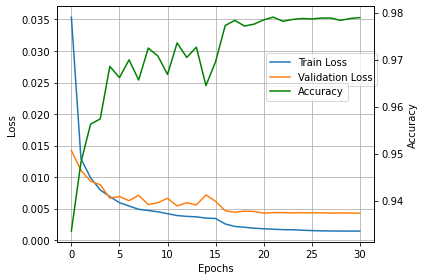

In [6]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.plot(history['train_loss'], label='Train Loss')
ax1.plot(history['val_loss'], label='Validation Loss')
ax1.tick_params(axis='y')
ax1.grid()
ax1.legend(loc=(0.66, 0.66))

ax2 = ax1.twinx()  
ax2.set_ylabel('Accuracy')  
ax2.plot(history['metrics'], color='g', label='Accuracy')
ax2.tick_params(axis='y')
ax2.legend(loc=(0.66, 0.6))

fig.tight_layout()
plt.show()

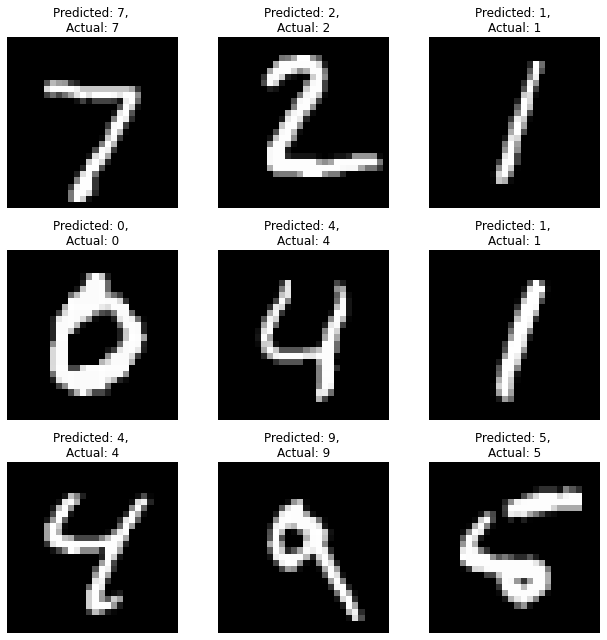

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(9, 9))

for i, ax in enumerate(axes.flat):
    images, labels = test_dataset[i]
    ax.imshow(images, cmap='gray')
    predicted_label = project.predict(torch.from_numpy(images).unsqueeze(0))
    
    # Set title with predicted and actual labels
    ax.set_title(f"Predicted: {np.argmax(predicted_label.cpu())}, \nActual: {np.argmax(labels)}")
    
    # Remove axis
    ax.axis('off')

plt.tight_layout()
plt.show()